In [4]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'tensorflow'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

NameError: name 'keras' is not defined

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

NameError: name 'plt' is not defined

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

NameError: name 'train_images' is not defined

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

NameError: name 'plt' is not defined

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

NameError: name 'keras' is not defined

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'model' is not defined

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4851 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3639 - accuracy: 0.8673
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3268 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3056 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2885 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2751 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2617 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2501 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2415 - accuracy: 0.9100
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.230

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3252 - accuracy: 0.8867

Test accuracy: 0.8866999745368958


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([1.3398457e-07, 9.0808836e-09, 9.1178814e-10, 7.8486259e-11,
       2.0934430e-09, 2.4637945e-03, 8.6221430e-09, 7.0092450e-03,
       1.8300353e-11, 9.9052680e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

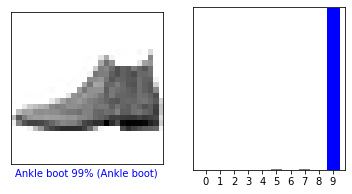

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

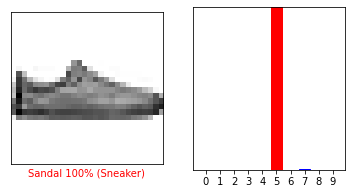

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

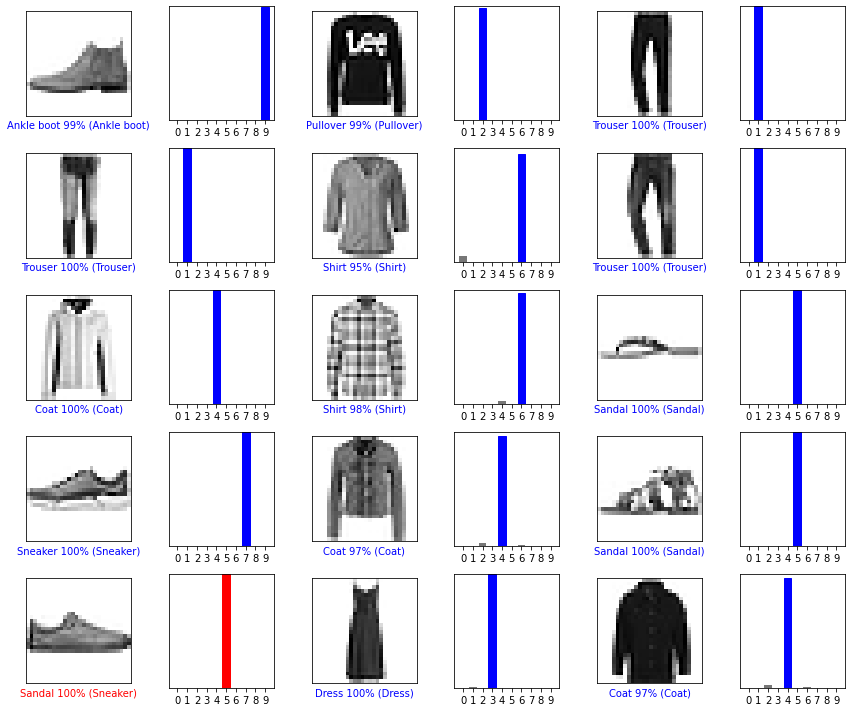

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()